In [1]:
import pandas as pd
import numpy as np
import nltk as nltk
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import string # python library
import re # regex library
from gensim.parsing.preprocessing import preprocess_string, strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, stem_text # Preprocesssing
from gensim.corpora import Dictionary
from gensim.models import Word2Vec,NormModel # Word2vec
from nltk import bigrams
from sklearn import cluster # Kmeans clustering
from sklearn import metrics # Metrics for evaluation
from sklearn.decomposition import PCA #PCA
from sklearn.manifold import TSNE #TSNE

In [192]:
trueNews = pd.read_csv("True.csv")
fakeNews = pd.read_csv("Fake.csv")
trueNews['subject'].iloc[0]

'politicsNews'

In [178]:
trueNews.text

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
21412    BRUSSELS (Reuters) - NATO allies on Tuesday we...
21413    LONDON (Reuters) - LexisNexis, a provider of l...
21414    MINSK (Reuters) - In the shadow of disused Sov...
21415    MOSCOW (Reuters) - Vatican Secretary of State ...
21416    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 21417, dtype: object

In [180]:
cleansed_data = []
for data in trueNews.text:
    if "@realDonaldTrump : - " in data:
        cleansed_data.append(data.split("@realDonaldTrump : - ")[1])
    elif "(Reuters) -" in data:
        cleansed_data.append(data.split("(Reuters) - ")[1])
    else:
        cleansed_data.append(data)

        
trueNews["text"] = cleansed_data
trueNews

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      The head of a conservative Republican faction ...  politicsNews   
1      Transgender people will be allowed for the fir...  politicsNews   
2      The special counsel investigation of links bet...  politicsNews   
3      Trump campaign adviser George Papadopoulos tol...  politicsNews   
4      President Donald Trump called on the U.S. Post...  politicsNews   
...                                                  ...           ...   
21412  NATO allies on Tuesday welcomed President Dona...     worldnews   
21413  LexisNexis, a provider of legal, regulatory an...     worldnews   
21414  In the shadow of disused Soviet-era factories ...     worldnews   
21415  Vatican Secretary of State Cardinal Pietro Par...     worldnews   
21416  Indonesia will buy 11 Sukhoi fighter jets wort...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [5]:
# Merging title and text
fakeNews['Sentences'] = fakeNews['title'] + ' ' + fakeNews['text']
trueNews['Sentences'] = trueNews['title'] + ' ' + trueNews['text']

# Adding fake and true label
fakeNews['Label'] = 0
trueNews['Label'] = 1

# We can merge both together since we now have labels
final_data = pd.concat([fakeNews, trueNews])

# Randomize the rows so its all mixed up
final_data1 = final_data.sample(frac=1).reset_index(drop=True)

# Drop columns not needed
final_data = final_data1.drop(['title', 'text', 'subject', 'date'], axis = 1)

final_data.head(10)
Date = final_data1.date

In [15]:
hashmap = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hashmap1 = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
tempDate = []
newDate = []
for i in range(len(Date)):
    tempDate = Date[i].split()
    dateStr = ""
    if tempDate[0] in hashmap:
        dateStr = str(hashmap[tempDate[0]]) + "/" + tempDate[1].rstrip(",") + "/" + tempDate[2]
    elif tempDate[0] in hashmap1:
        dateStr = str(hashmap1[tempDate[0]]) + "/" + tempDate[1].rstrip(",") + "/" + tempDate[2]
    if dateStr == "":
        newDate.append(None)
    else:
        newDate.append(dateStr)
        
Date
newDate

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-af00a7237f5f>", line 6, in <module>
    tempDate = Date[i].split()
  File "C:\Users\dsola\anaconda3\lib\site-packages\pandas\core\series.py", line 882, in __getitem__
    return self._get_value(key)
  File "C:\Users\dsola\anaconda3\lib\site-packages\pandas\core\series.py", line 990, in _get_value
    return self.index._get_values_for_loc(self, loc, label)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\dsola\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occu

TypeError: object of type 'NoneType' has no len()

In [11]:
final_data1['newDate'] = newDate

In [12]:
Remove_list = final_data1[final_data1['newDate'].isnull()].index.tolist()

In [13]:
for i in Remove_list:
    final_data1 = final_data1.drop(i)

In [14]:
final_data1

title  \
0      EU's top diplomat defends Iran deal after Trum...   
1      RUSH LIMBAUGH ASKS: “What Would America Be Lik...   
2       GOP Lobbyist Takes A COMPLETELY Unexpected St...   
3      Trump, Clinton spend much of debate insulting ...   
4      Poland gives government key election role, opp...   
...                                                  ...   
44893  AWESOME! PRO-TRUMP LATINO Tells Horrors Of Soc...   
44894   Creationist Ken Ham Is Building A $101M Noah’...   
44895  Saudi-owned TV says Hariri was target of assas...   
44896   Bristol Palin Cheers For Christian Students F...   
44897  Defense for Brazil's Temer asks Supreme Court ...   

                                                    text          subject  \
0      The United States cannot unilaterally cancel t...     politicsNews   
1      Rush Limbaugh is spot on with his analysis of ...  Government News   
2      A GOP lobbyist who s known for his own brand o...             News   
3      There was a moment in Sunday’s U.S. presidenti...     politicsNews   
4      Poland s parliament has passed a bill that giv...        worldnews   
...                                                  ...              ...   
44893  THE SOCIALIST PRESIDENT WAS THIS GUY S TEACHER...  Government News   
44894  Australian-born Creationist Ken Ham and his fu...             News   
44895  The Saudi-owned pan-Arab television channel al...        worldnews   
44896  In February, video surfaced of evangelical pas...             News   
44897  Lawyers defending Brazilian President Michel T...        worldnews   

                      date                                          Sentences  \
0        October 13, 2017   EU's top diplomat defends Iran deal after Trum...   
1             Jul 13, 2016  RUSH LIMBAUGH ASKS: “What Would America Be Lik...   
2          August 23, 2016   GOP Lobbyist Takes A COMPLETELY Unexpected St...   
3        October 10, 2016   Trump, Clinton spend much of debate insulting ...   
4       December 15, 2017   Poland gives government key election role, opp...   
...                    ...                                                ...   
44893          Jun 9, 2016  AWESOME! PRO-TRUMP LATINO Tells Horrors Of Soc...   
44894     January 18, 2016   Creationist Ken Ham Is Building A $101M Noah’...   
44895    November 4, 2017   Saudi-owned TV says Hariri was target of assas...   
44896       March 20, 2016   Bristol Palin Cheers For Christian Students F...   
44897  September 16, 2017   Defense for Brazil's Temer asks Supreme Court ...   

       Label     newDate  
0          1  10/13/2017  
1          0   7/13/2016  
2          0   8/23/2016  
3          1  10/10/2016  
4          1  12/15/2017  
...      ...         ...  
44893      0    6/9/2016  
44894      0   1/18/2016  
44895      1   11/4/2017  
44896      0   3/20/2016  
44897      1   9/16/2017  

[44853 rows x 7 columns]

In [100]:
final_data1['newDate'] = pd.to_datetime(final_data1['newDate'],format='%m/%d/%Y')
final_data1['month_year']

0        2017-10
1        2016-07
2        2016-08
3        2016-10
4        2017-12
          ...   
44893    2016-06
44894    2016-01
44895    2017-11
44896    2016-03
44897    2017-09
Name: month_year, Length: 44853, dtype: period[M]

In [164]:
fakeNews


hashmap = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hashmap1 = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
tempDate = []
newDate = []
for i in range(len(Date)):
    tempDate = Date[i].split()
    dateStr = ""
    if tempDate[0] in hashmap:
        dateStr = str(hashmap[tempDate[0]]) + "/" + tempDate[1].rstrip(",") + "/" + tempDate[2]
    elif tempDate[0] in hashmap1:
        dateStr = str(hashmap1[tempDate[0]]) + "/" + tempDate[1].rstrip(",") + "/" + tempDate[2]
    if dateStr == "":
        newDate.append(None)
    else:
        newDate.append(dateStr)

title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date                                          Sentences  \
0      December 31, 2017   Donald Trump Sends Out Embarrassing New Year’...   
1      December 31, 2017   Drunk Bragging Trump Staffer Started Russian ...   
2      December 30, 2017   Sheriff David Clarke Becomes An Internet Joke...   
3      December 29, 2017   Trump Is So Obsessed He Even Has Obama’s Name...   
4      December 25, 2017   Pope Francis Just Called Out Donald Trump Dur...   
...                  ...                                                ...   
23476   January 16, 2016  McPain: John McCain Furious That Iran Treated ...   
23477   January 16, 2016  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478   January 15, 2016  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479   January 14, 2016  How to Blow $700 Million: Al Jazeera America F...   
23480   January 12, 2016  10 U.S. Navy Sailors Held by Iranian Military ...   

       Label  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
23476      0  
23477      0  
23478      0  
23479      0  
23480      0  

[23481 rows x 6 columns]

[2015, 2016, 2017] [2479, 16470, 25904]


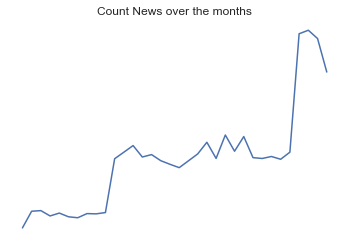

In [175]:
Date = final_data1['newDate']
Month_year = final_data1['newDate'].dt
# # yearCount = final_data1['text'].groupby(final_data1.newDate.dt.year).agg('count')
monthCount = final_data1['text'].groupby(final_data1.newDate.dt.to_period('M')).agg('count')
monthCount
print(year, year_count)
monthCount
for i in month:
    count.append(monthCount[i])

count = monthCount.tolist()
timeline = list(final_data1['month_year'])

monthYear = set()
DateStr = ""
for i in range(len(final_data1)):
    DateStr = str(timeline[i].year) + "-" + str(timeline[i].month)
    monthYear.add(DateStr)

import matplotlib.dates as mdates
from datetime import datetime

plt.format_xdata = mdates.DateFormatter('%m-%Y')
plt.plot(list(monthYear),count)
plt.axis('off')
plt.title('Count News over the months')
plt.xlabel('Month-Year')
plt.ylabel('Count of News over the tenure')
plt.show()
# monthYear

In [6]:
final_data1['subject'] = final_data1['subject'].str.replace('politicsNews', 'Politics')
final_data1['subject'] = final_data1['subject'].str.replace('politics', 'Politics')
final_data1['subject'] = final_data1['subject'].str.replace('worldnews', 'World')
final_data1['subject'] = final_data1['subject'].str.replace('Government News', 'Gov')
final_data1['subject'] = final_data1['subject'].str.replace('US_News', 'US')
final_data1['subject'] = final_data1['subject'].str.replace('News', 'Other')
final_data1['subject'] = final_data1['subject'].str.replace('left-news', 'Reform')
# final_data.subject.unique()
final_data1.subject.value_counts()

Politics       18113
World          10145
Other           9050
Reform          4459
Gov             1570
US               783
Middle-east      778
Name: subject, dtype: int64

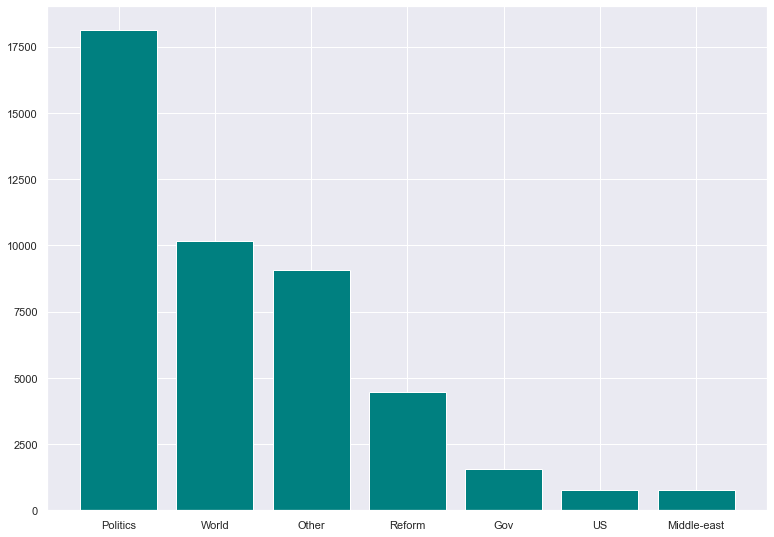

In [7]:
arr = (final_data1.subject.value_counts()).to_numpy()
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0,0,1,1])
langs = ['Politics','World','Other','Reform','Gov','US','Middle-east']
students = arr
ax.bar(langs,students, color = 'teal')
plt.show()

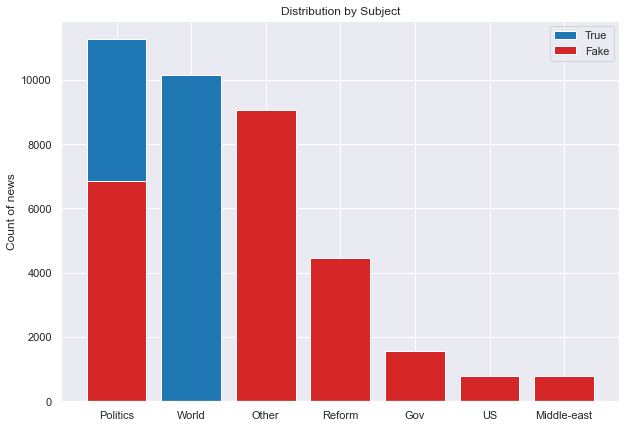

In [8]:
fakeSubjects = (final_data1.subject[final_data1.Label == 0].value_counts()).to_numpy()
trueSubjects = (final_data1.subject[final_data1.Label == 1].value_counts()).to_numpy()
fakeLabels = ['Other','Politics','Reform','Gov','US','Middle-east']
trueLabels = ['Politics','World'] 
fig = plt.subplots(figsize =(10, 7)) 
p1 = plt.bar(trueLabels, trueSubjects,color = 'tab:blue') 
p2 = plt.bar(fakeLabels, fakeSubjects,color = 'tab:red') 
plt.ylabel('Count of news') 
plt.title('Distribution by Subject') 
plt.xticks(langs) 
plt.legend((p1[0], p2[0]), ('True', 'Fake')) 
plt.show() 

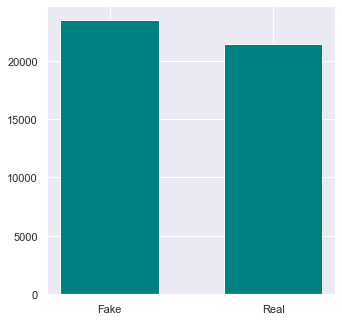

In [9]:
count = [len(fakeNews),len(trueNews)]
fig = plt.figure(figsize =(4,4))
ax = fig.add_axes([0,0,1,1])
Labels = ['Fake', 'Real']
ax.bar(Labels,count,color = 'teal',width = 0.6)
plt.show()

In [10]:
def remove_URL(s):
    regex = re.compile(r'https?://\S+|www\.\S+|bit\.ly\S+')
    return regex.sub(r'',s)

# Preprocessing functions to remove lowercase, links, whitespace, tags, numbers, punctuation, strip words
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, remove_URL, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords,stem_text]

# Here we store the processed sentences and their label
processed_data = []
processed_labels = []

for index, row in final_data.iterrows():
    words_broken_up = preprocess_string(row['Sentences'], CUSTOM_FILTERS)
    # This eliminates any fields that may be blank after preprocessing
    if len(words_broken_up) > 0:
        processed_data.append(words_broken_up)
        processed_labels.append(row['Label'])

In [26]:
processed_data

[['finnish',
  'polic',
  'rap',
  'deputi',
  'minist',
  'hide',
  'car',
  'boot',
  'govern',
  'crisi',
  'finnish',
  'polic',
  'reprimand',
  'man',
  'travel',
  'car',
  'boot',
  'hide',
  'meet',
  'prime',
  'minist',
  'juha',
  'sipila',
  'govern',
  'crisi',
  'summer',
  'sai',
  'breach',
  'traffic',
  'code',
  'polic',
  'statement',
  'man',
  'boot',
  'effect',
  'indic',
  'travel',
  'state',
  'secretari',
  'samuli',
  'virtanen',
  'deputi',
  'foreign',
  'minist',
  'timo',
  'soini',
  'meet',
  'took',
  'place',
  'june',
  'dai',
  'virtanen',
  's',
  'rule',
  'finn',
  'parti',
  'elect',
  'anti',
  'immigr',
  'hardlin',
  'new',
  'leader',
  'govern',
  'close',
  'collaps',
  'group',
  'politician',
  'includ',
  'virtanen',
  'soini',
  'follow',
  'week',
  'walk',
  'finn',
  'parti',
  'announc',
  'form',
  'new',
  'group',
  'finn',
  'parti',
  'thrown',
  'govern',
  'new',
  'blue',
  'reform',
  'group',
  'kept',
  'cabinet',
  '

In [11]:
model = Word2Vec(processed_data, min_count=20,
                     window=2,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)

model1 = Word2Vec(processed_data,min_count=1)

In [12]:
model.wv.most_similar("nation") 

[('secur', 0.5270484089851379),
 ('states’', 0.5154712796211243),
 ('homeland', 0.5138932466506958),
 ('council', 0.4936879277229309),
 ('intergovernment', 0.4543650150299072),
 ('country’', 0.45145586133003235),
 ('countri', 0.44850999116897583),
 ('auspic', 0.44561606645584106),
 ('sidelin', 0.4456007480621338),
 ('abstent', 0.44126784801483154)]

In [13]:
def ReturnVector(x):
    try:
        return model[x]
    except:
        return np.zeros(100)
    
def Sentence_Vector(sentence):
    word_vectors = list(map(lambda x: ReturnVector(x), sentence))
    return np.average(word_vectors, axis=0).tolist()

X = []
for data_x in processed_data:
    X.append(Sentence_Vector(data_x))


def ReturnVector1(x):
    try:
        return model1[x]
    except:
        return np.zeros(100)
    
def Sentence_Vector1(sentence):
    word_vectors1 = list(map(lambda x1: ReturnVector1(x1), sentence))
    return np.average(word_vectors1, axis=0).tolist()

X1 = []
for data_x in processed_data:
    X1.append(Sentence_Vector1(data_x))

<ipython-input-13-b3936c2a40b0>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return model[x]
<ipython-input-13-b3936c2a40b0>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return model1[x]
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
len(X1)

44889

In [14]:
X_np = np.array(X)
X_np.shape

X1_np = np.array(X1)
X1_np.shape


(44889, 100)

In [15]:
# Training for 2 clusters (Fake and Real)
kmeans = cluster.KMeans(n_clusters=2)

# Fit predict will return labels
clustered = kmeans.fit_predict(X_np)

kmeans1 = cluster.KMeans(n_clusters=2)
clustered1 = kmeans.fit_predict(X1_np)

In [16]:
testing_df = {'Sentence': processed_data, 'Labels': processed_labels, 'Prediction': clustered}
testing_df = pd.DataFrame(data=testing_df)

testing_df.head(10)


testing_df1 = {'Sentence': processed_data, 'Labels': processed_labels, 'Prediction': clustered1}
testing_df1 = pd.DataFrame(data=testing_df1)

testing_df1.head(10)


Sentence  Labels  Prediction
0  [finnish, polic, rap, deputi, minist, hide, ca...       1           0
1  [factbox, puerto, rico, debt, crisi, keep, ove...       1           0
2  [“trigger, ”, black, woman, goe, berserk, spot...       0           1
3  [netherland, troll, trump, word, it’, hilari, ...       0           1
4  [wow, california, suprem, court, case, decid, ...       0           0
5  [second, sarah, palin’, insan, trump, endors, ...       0           1
6  [u, s, senat, s, tax, lawmak, target, corpor, ...       1           0
7  [u, s, toler, venezuelan, dictatorship, halei,...       1           0
8  [fox, host, goe, ‘soulless’, hillari, clinton,...       0           1
9  [presid, obama, stun, oil, compani, crush, pro...       0           0

In [17]:
correct = 0
incorrect = 0
for index, row in testing_df.iterrows():
    if row['Labels'] == row['Prediction']:
        correct += 1
    else:
        incorrect += 1
        
print("Correctly clustered news: " + str((correct*100)/(correct+incorrect)) + "%")


correct1= 0
incorrect1= 0
for index, row in testing_df1.iterrows():
    if row['Labels'] == row['Prediction']:
        correct1 += 1
    else:
        incorrect1 += 1
        
print("Correctly clustered news from model 1: " + str((correct1*100)/(correct1+incorrect1)) + " %") 

Correctly clustered news: 87.79433714272984%
Correctly clustered news from model 1: 11.822495488872553%


In [18]:
# PCA of sentence vectors
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_np)

PCA_df = pd.DataFrame(pca_result)
PCA_df['cluster'] = clustered
PCA_df.columns = ['x1','x2','cluster']

In [19]:
# T-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

TSNE_df = pd.DataFrame(tsne_result)
TSNE_df['cluster'] = clustered
TSNE_df.columns = ['x1','x2','cluster']

Text(0.5, 1.0, 'Visualized on PCA')

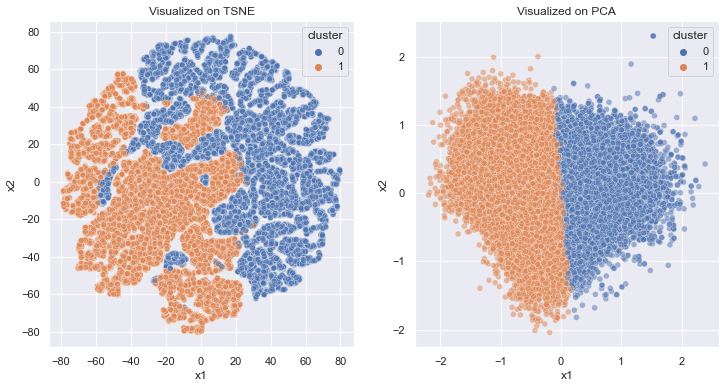

In [20]:
# Plots
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=PCA_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
sns.scatterplot(data=TSNE_df,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE')
ax[1].set_title('Visualized on PCA')

In [21]:
# Testing with fake news generated from https://www.thefakenewsgenerator.com/
onion_data = "Flint Residents Learn To Harness Superpowers, But Trump Gets Away Again They developed superpowers after years of drinking from a lead-poisoned water supply. But just having incredible abilities doesn't make them superheroes. Not yet. Donald Trump faced off against the superpowered civilians but he got away before they could catch him"

# Preprocess article
onion_data = preprocess_string(onion_data, CUSTOM_FILTERS)

# Get sentence vector
onion_data = Sentence_Vector(onion_data)

# Get prediction
kmeans.predict(np.array([onion_data]))

<ipython-input-13-b3936c2a40b0>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return model[x]


array([1])

In [22]:
# News from BBC

bbc_data = "Nasa Mars 2020 Mission's MiMi Aung on women in space Next year, Nasa will send a mission to Mars. The woman in charge of making the helicopter that will be sent there – which is set to become the first aircraft to fly on another planet – is MiMi Aung. At 16, MiMi travelled alone from Myanmar to the US for access to education. She is now one of the lead engineers at Nasa. We find out what it's like being a woman in space exploration, and why her mum is her biggest inspiration."

# Preprocess article
bbc_data = preprocess_string(bbc_data, CUSTOM_FILTERS)

# Get sentence vector
bbc_data = Sentence_Vector(bbc_data)

# Get prediction
kmeans.predict(np.array([bbc_data]))

<ipython-input-13-b3936c2a40b0>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return model[x]


array([1])